<a href="https://colab.research.google.com/github/pyagoubi/Customer-Analysis/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [51]:
data = pd.read_csv('/content/drive/MyDrive/upwork2/CutDownfile - Members and holdings 16.02.2023 (1).csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,32,35,43,52,53,58,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
data.head(5)

,MemberNumber,UserRef,InternalRef2,Country,MemberStatus,DateofDeath,DOB,Sex,ContactforCorres,SARef,...,CurrentUnitsCalculated,CurrentUnitsManual,BookValue,CurrentValueCalculated,ValDate,ValLatest,VotingRights,UserAssClass,UserAssGrp,UnRegFg
0,12,MW00012,1.00,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,62894.57,285342.01,11/30/2022,285342.01,NaN,NaN,NaN,NaN
1,12,MW00012,1.00,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,5768.16,5773.80,2/1/2023,5773.80,NaN,NaN,NaN,NaN
2,19,MW00019,2.00,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,8495.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN
3,19,MW00019,2.00,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,48287.27,47133.99,2/14/2023,47133.99,NaN,NaN,NaN,NaN
4,20,MW00020,4.00,United Kingdom,Full Drawdown,NaN,2/7/48 0:00,Male,Member,SA0001,...,NaN,NaN,16995.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN


# Checking main info

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MemberNumber            9799 non-null   int64  
 1   UserRef                 9798 non-null   object 
 2   InternalRef2            16 non-null     float64
 3   Country                 9788 non-null   object 
 4   MemberStatus            9799 non-null   object 
 5   DateofDeath             3 non-null      object 
 6   DOB                     9797 non-null   object 
 7   Sex                     9795 non-null   object 
 8   ContactforCorres        9799 non-null   object 
 9   SARef                   9799 non-null   object 
 10  SchemeName              9795 non-null   object 
 11  BrandName               9792 non-null   object 
 12  BrandRef                9792 non-null   object 
 13  ProposedRetireAge       9793 non-null   float64
 14  ProposedRetireDate      9791 non-null   

The dataset contains 9799 rows and 70 columns. Columns do have different datatypes and are either float, object or int.  
There seems to be missing values at different levels.

In [54]:
data['MemberNumber'].nunique()

4689

In [55]:
data[['MemberNumber', 'DOB']]

,MemberNumber,DOB
0,12,6/9/52 0:00
1,12,6/9/52 0:00
2,19,12/12/47 0:00
3,19,12/12/47 0:00
4,20,2/7/48 0:00
...,...,...
9794,2765,10/9/60 0:00
9795,7211,2/6/62 0:00
9796,7211,2/6/62 0:00
9797,7213,4/18/67 0:00


MemberNumber is not unique, meaning for customer focused analysis date must be grouped per MemberNumber

# Redundant columns

Some information seem redundant

In [56]:
data[['NextRenewalDate', 'NextRenewalMonth', 'NextRenewalDay']]

,NextRenewalDate,NextRenewalMonth,NextRenewalDay
0,4/2/24 0:00,4.00,2
1,4/2/24 0:00,4.00,2
2,4/1/24 0:00,4.00,1
3,4/1/24 0:00,4.00,1
4,4/1/24 0:00,4.00,1
...,...,...,...
9794,6/29/23 0:00,6.00,29
9795,10/12/22 0:00,10.00,12
9796,10/12/22 0:00,10.00,12
9797,10/12/22 0:00,10.00,12


In [57]:
data[['CommencementDate', 'CommencementMonth', 'CommencementYear']]

,CommencementDate,CommencementMonth,CommencementYear
0,4/22/04 0:00,4,2004
1,4/22/04 0:00,4,2004
2,5/26/04 0:00,5,2004
3,5/26/04 0:00,5,2004
4,5/26/04 0:00,5,2004
...,...,...,...
9794,6/29/17 0:00,6,2017
9795,10/12/22 0:00,10,2022
9796,10/12/22 0:00,10,2022
9797,10/12/22 0:00,10,2022


We can drop the columns: 'CommencementMonth', 'CommencementYear', 'NextRenewalMonth', 'NextRenewalDay'

In [58]:
#drop columns
data.drop(['CommencementMonth', 'CommencementYear', 'NextRenewalMonth', 'NextRenewalDay'], axis=1, inplace=True)

Birthday information can be inferred 

In [59]:
data[['75thBirthday', '75before2262010', '77thBirthday', 'DOB'] ].isnull().sum()

75thBirthday       2
75before2262010    0
77thBirthday       2
DOB                2
dtype: int64

In [60]:
data.loc[(data['75thBirthday'].isnull()) & (data['77thBirthday'].isnull()) & (data['DOB'].isnull()) , '75before2262010']

423    N
424    N
Name: 75before2262010, dtype: object

Since NAN values are the same, there is no additional information in keeping the birthday columns.

In [61]:
#drop columns
data.drop(['75thBirthday', '77thBirthday', '75before2262010'], axis=1, inplace=True)

# Checking missing values

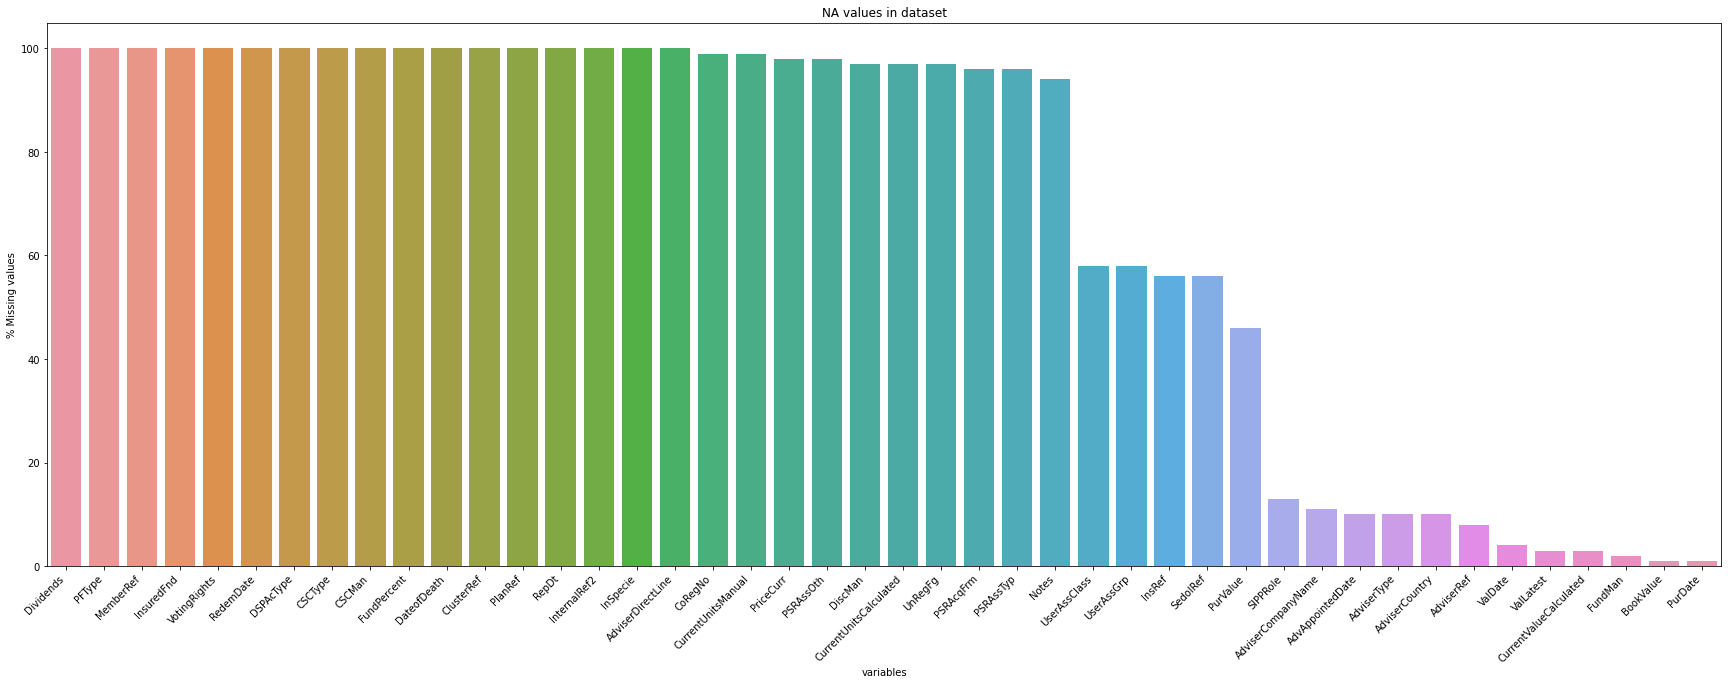

In [62]:
#create a dataframes with percentages of missing values
missing = pd.DataFrame(columns = ['% Missing values'],data = 100*round(data.isnull().sum().sort_values(ascending = False)/len(data),2))
missing_nz = missing[missing['% Missing values']>0.0].reset_index().rename(columns={'index': 'variables'})


#Plot missing values
#plt.style.use('ggplot')
fig, ax = plt.subplots(1,1, figsize=(30,10))

ax.set_title('NA values in dataset')
sns.barplot(data=missing_nz,x=missing_nz.variables,y=missing_nz['% Missing values'], orient = 'v', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [63]:
print(missing[missing['% Missing values']>90].count())
print(missing[(missing['% Missing values']>40) & (missing['% Missing values']<=60)].count())
print(missing[missing['% Missing values']<=20].count())

% Missing values    27
dtype: int64
% Missing values    5
dtype: int64
% Missing values    31
dtype: int64


Missing values can be classified as follows  
* 27 variables do have a high portion of missing values (close to 100%) --> these variables will be dropped 
* 5 variables have a portion of missing values between 40% and 60% 
* 31 variebles have less than 20% missing values

In [64]:
# dropping variables with very high No of missing values
remove = list(missing[missing['% Missing values']>90].index)
data.drop(remove, inplace =True, axis =1)

# Check duplicated rows

In [65]:
data.duplicated().sum()

0

No duplicate rows

# Analysing customer variables

Age at commencement

In [66]:
data['DOB'].isnull().sum()

2

In [67]:
#creating dataframe with unique members
df_commencement = data[['MemberNumber', 'DOB', 'CommencementDate']].copy()
df_commencement.duplicated


<bound method DataFrame.duplicated of       MemberNumber            DOB CommencementDate
0               12    6/9/52 0:00     4/22/04 0:00
1               12    6/9/52 0:00     4/22/04 0:00
2               19  12/12/47 0:00     5/26/04 0:00
3               19  12/12/47 0:00     5/26/04 0:00
4               20    2/7/48 0:00     5/26/04 0:00
...            ...            ...              ...
9794          2765   10/9/60 0:00     6/29/17 0:00
9795          7211    2/6/62 0:00    10/12/22 0:00
9796          7211    2/6/62 0:00    10/12/22 0:00
9797          7213   4/18/67 0:00    10/12/22 0:00
9798          7213   4/18/67 0:00    10/12/22 0:00

[9799 rows x 3 columns]>

In [68]:
# removing duplicates

df_commencement = df_commencement.drop_duplicates()

In [69]:
# formating DOB column
df_commencement['DOB'] = pd.to_datetime(data['DOB'])
df_commencement.loc[df_commencement['DOB'].dt.year >= 2020, 'DOB'] -= pd.DateOffset(years=100)

<ipython-input-69-72cecca7a462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commencement['DOB'] = pd.to_datetime(data['DOB'])
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [70]:
# calculate Age at commencement by CommencementDate - DOB (date of birth)

df_commencement['CommencementDate'] = pd.to_datetime(df_commencement['CommencementDate'])

df_commencement['Age at commencement'] = (df_commencement['CommencementDate'] - df_commencement['DOB']).dt.days / 365.25

<ipython-input-70-2d6b4b250c88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commencement['CommencementDate'] = pd.to_datetime(df_commencement['CommencementDate'])
<ipython-input-70-2d6b4b250c88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commencement['Age at commencement'] = (df_commencement['CommencementDate'] - df_commencement['DOB']).dt.days / 365.25


In [71]:
df_commencement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 0 to 9797
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MemberNumber         4689 non-null   int64         
 1   DOB                  4687 non-null   datetime64[ns]
 2   CommencementDate     4689 non-null   datetime64[ns]
 3   Age at commencement  4687 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 183.2 KB


In [72]:
df_commencement['Age at commencement'].mean()

52.39262661209073

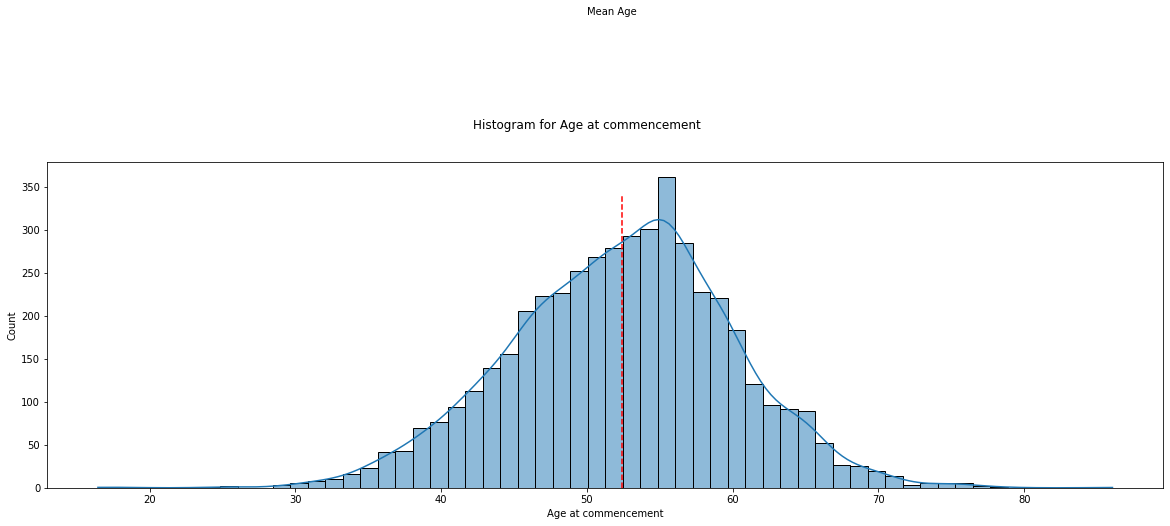

In [73]:
# Plot the data
fig, axes = plt.subplots(1, 1, figsize = (20, 6))
fig.suptitle('Histogram for Age at commencement')
sns.histplot(x = 'Age at commencement', data = df_commencement, kde = True, ax = axes)
plt.axvline(x=df_commencement['Age at commencement'].mean(), linestyle="--", label = 'Mean', ymax = 0.9,
            color='red')
plt.text(50,550,'Mean Age')
plt.show()


The average age of commencement is at 52 years. The distribution is slightly left-skewed.

<AxesSubplot:xlabel='Age at commencement'>

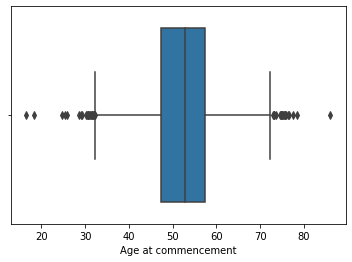

In [74]:
sns.boxplot(x=df_commencement['Age at commencement'] )

In [75]:
df_commencement['Age at commencement'].describe().T

count   4687.00
mean      52.39
std        7.59
min       16.45
25%       47.35
50%       52.82
75%       57.42
max       86.05
Name: Age at commencement, dtype: float64

The age at commencement is between 16 and 86 years. 50% of all customers are between 46 and 57 years at commencement.

Size of Investment

In [76]:
data['ValLatest'].isnull().sum()

341

There is a very small number of NAN values, we use the column mean as imputation.

In [77]:
data['ValLatest'] = data['ValLatest'].fillna(data['ValLatest'].mean())

In [78]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.groupby('MemberNumber')['ValLatest'].sum().describe()

count      4689.00
mean     294191.09
std      348794.66
min        -180.00
25%       90312.47
50%      181201.00
75%      380585.82
max     4623396.00
Name: ValLatest, dtype: float64

At average we have 294.191 investment volume.
50% are below 181.201

Plotting distribution without accounting for outliers

<ipython-input-79-350feb04691e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  o.set_xticklabels(xlabels)


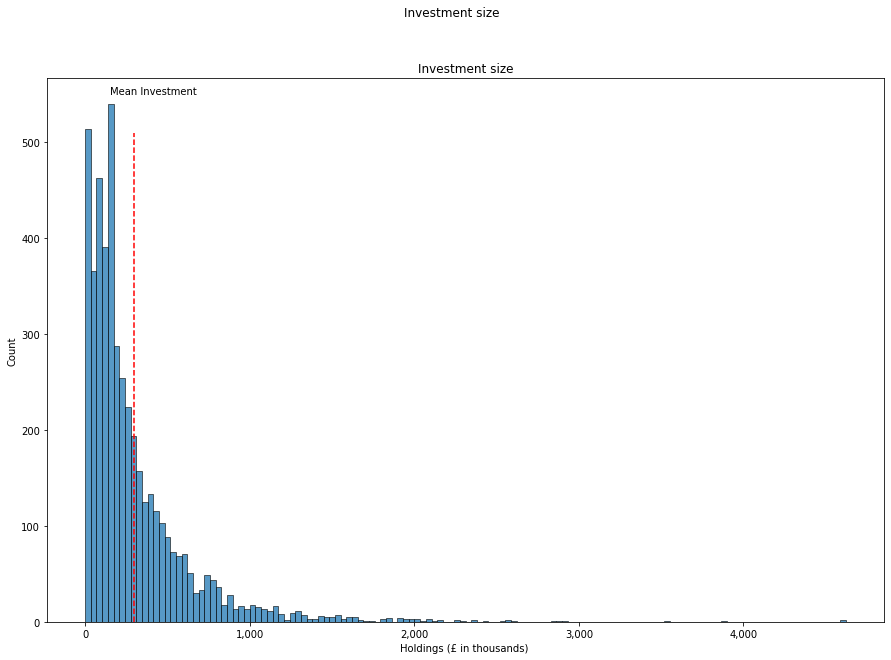

In [79]:
# Plot the data
df_inv = pd.DataFrame(data.groupby('MemberNumber')['ValLatest'].sum())
df_inv.reset_index(inplace=True)

fig, axes = plt.subplots(1, 1, figsize = (15, 10))
fig.suptitle('Investment size')
o = sns.histplot(x = 'ValLatest', data = df_inv, ax = axes)
xlabels = ['{:,.0f}'.format(x) for x in o.get_xticks()/1000]
plt.axvline(x=df_inv['ValLatest'].mean(), linestyle="--", label = 'Mean', ymax = 0.9,
            color='red')
plt.text(150000,550,'Mean Investment')
o.set_xticklabels(xlabels)
axes.set(xlabel='Holdings (£ in thousands) ',
       ylabel='Count',
       title='Investment size')
#axes.ticklabel_format(useOffset=False, style='plain')

plt.show()

Check outliers

<AxesSubplot:>

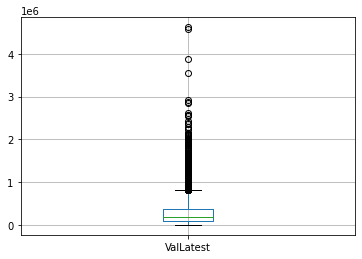

In [80]:
df_inv.boxplot('ValLatest')

There are many outliers on the upper side as can be seen by the whiskers plot.

Handling Outliers for Investment size

In [81]:
Q1 = df_inv['ValLatest'].quantile(0.25)
Q3 = df_inv['ValLatest'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1- 1.5*IQR
upper = Q3+ 1.5*IQR

In [82]:
print(f'Values above {upper} are considered outliers and will be dropped')

Values above 815995.845 are considered outliers and will be dropped


In [83]:
df_inv_clean = df_inv[~(df_inv['ValLatest']>upper)]

Investment size without outliers

<ipython-input-84-e03afbf6248e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


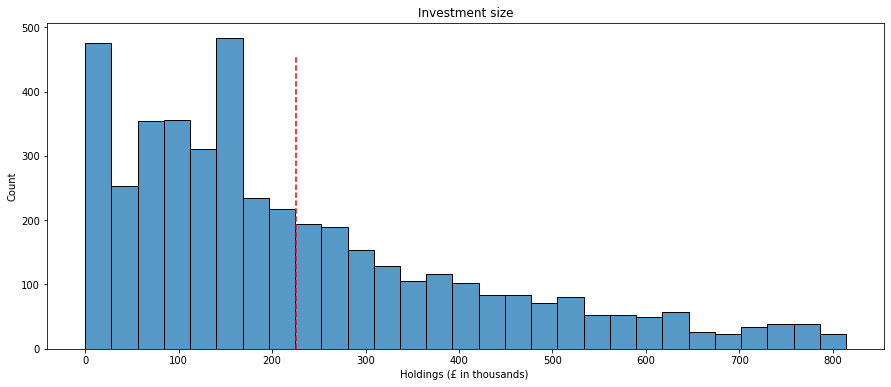

In [84]:
fig, axes = plt.subplots(1, 1, figsize = (15, 6))
#fig.suptitle('Investment size')
g = sns.histplot(x = 'ValLatest', data = df_inv_clean)
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
axes.set(xlabel='Holdings (£ in thousands) ',
       ylabel='Count',
       title='Investment size')
plt.axvline(x=df_inv_clean['ValLatest'].mean(), linestyle="--", label = 'Mean', ymax = 0.9,
            color='red')
plt.show()


In [85]:
df_inv_clean['ValLatest'].mean()

225163.64325668477

The mean without outliers is at 225.163.

In [86]:
df_inv_clean['ValLatest'].describe()

count     4384.00
mean    225163.64
std     190146.89
min       -180.00
25%      85058.05
50%     165035.70
75%     322898.22
max     814197.91
Name: ValLatest, dtype: float64

In [87]:
df_inv_clean['ValLatest'].count()/df_inv['ValLatest'].count()

0.9349541480059714

About 93 % of all customers hold holdings between -180 and 814.197

# Source of customer

In [88]:
# create Dataframe with source per member

df_source = data[['MemberNumber','AdviserCompanyName']].copy()

df_source = df_source.drop_duplicates()


In [89]:
df_source['AdviserCompanyName'].value_counts()

Hoxton Capital Management FZE                                                480
Hoxton Capital Management USA LLC                                            187
Blacktower Financial Management (Int) Ltd                                    146
Sovereign Group                                                              143
AHR Financial Consultation & Financial Analysis LLC                          134
                                                                            ... 
Ecclesiastical Financial Advisory Services Ltd                                 1
Wealthmasters Financial Management Ltd                                         1
Alan Parkinson T/A CPD Financial Advisors                                      1
Elm Financial Management Ltd AR of Wealthmasters Financial Management Ltd      1
Fairstone Financial Management (City) Ltd                                      1
Name: AdviserCompanyName, Length: 445, dtype: int64

The most used advisor company is Hoxton Capital Management

In [90]:
(df_source['AdviserCompanyName'].value_counts() == 1).sum()

183

There are 183 sources that are unique.

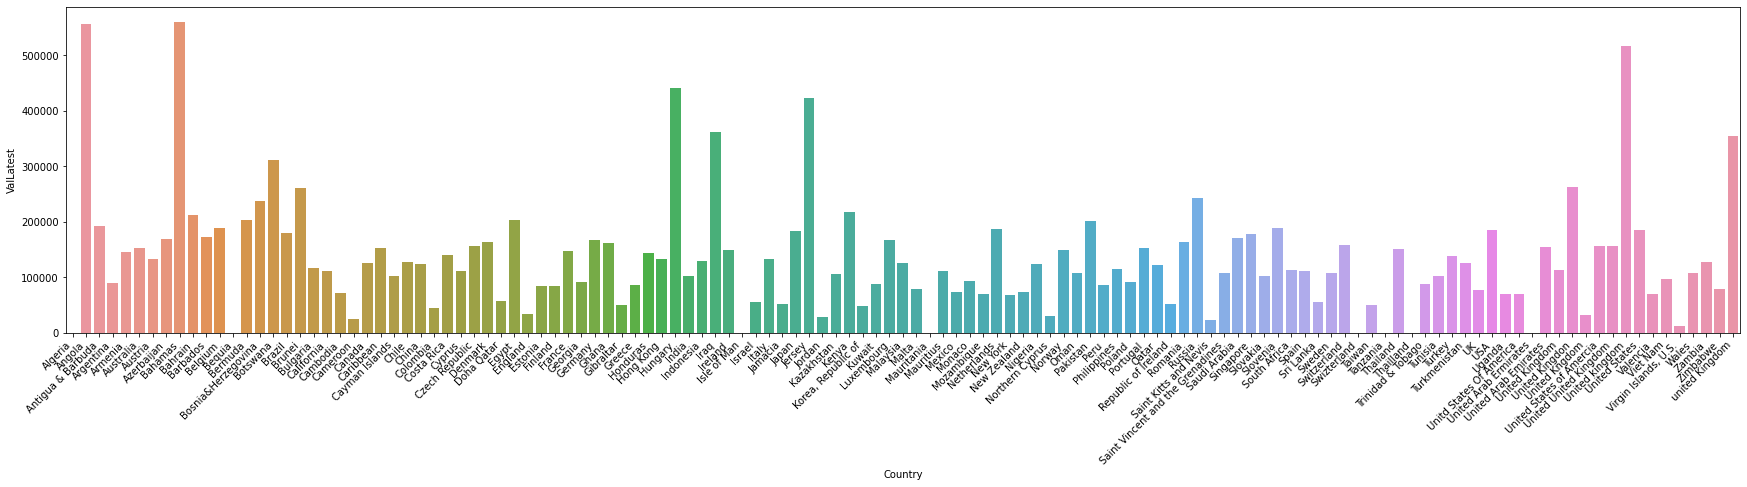

In [105]:
fig, axes = plt.subplots(1, 1, figsize = (30, 6))

df_country = pd.DataFrame(data.groupby('Country')['ValLatest'].mean())
sns.barplot(data = df_country, x=df_country.index, y='ValLatest')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



In [106]:
df_country[df_country['ValLatest']>300000]

,ValLatest
Country,
Angola,555073.25
Bahamas,559065.19
Botswana,310834.19
Hungary,439746.06
Iraq,361102.49
Jersey,423311.84
United kingdom,516966.56
united Kingdom,354960.96
